# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.063201e+01     8.495756e+00
 * time: 0.005408048629760742
     1     2.926685e+01     5.106897e+00
 * time: 0.015609025955200195
     2     2.513269e+01     9.365968e+00
 * time: 0.04032492637634277
     3     1.644508e+01     4.738888e+00
 * time: 0.07007789611816406
     4     1.504751e+01     4.546111e+00
 * time: 0.09523797035217285
     5     1.308224e+01     4.634578e+00
 * time: 0.11548304557800293
     6     1.141317e+01     1.959998e+00
 * time: 0.14075303077697754
     7     1.020831e+01     2.081586e+00
 * time: 0.16050004959106445
     8     9.931586e+00     7.805392e-01
 * time: 0.1809368133544922
     9     9.906036e+00     1.274229e+00
 * time: 0.19654583930969238
    10     9.901796e+00     1.251006e+00
 * time: 0.21171998977661133
    11     9.806069e+00     6.692064e-01
 * time: 0.231719970703125
    12     9.716566e+00     9.484123e-01
 * time: 0.24656987190246582
    13     9.623407e+00     7.464377e-01
 * time: 

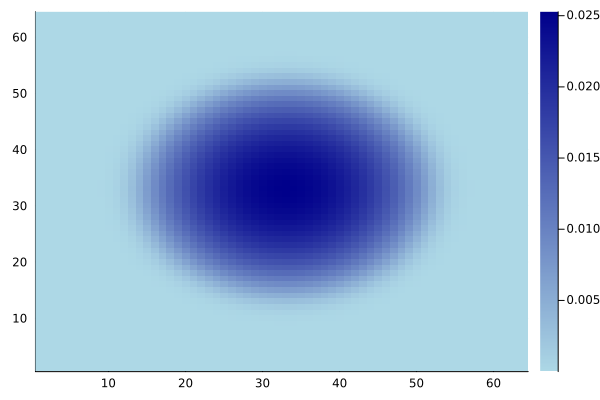

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)